Notebook 2: Visualization
=========================
In this notebook, the data will be visualized and analyzed

# Import Modules and Data

In [3]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, DatePicker, HoverTool, WheelZoomTool
from bokeh.plotting import figure, show

import roafr_utils

%matplotlib inline
plt.style.use("dark_background");

In [4]:
df = roafr_utils.df_from_pickle('../data/df.p')

# Time Series

In [5]:
plot_df = pd.DataFrame({'is_weekend': df['is_weekend'], 
                        'time':df['date'].apply(lambda x: int(x.strftime('%H%M')))})

Text(0.5, 1.0, 'Distribution of Accidents by Daytime')

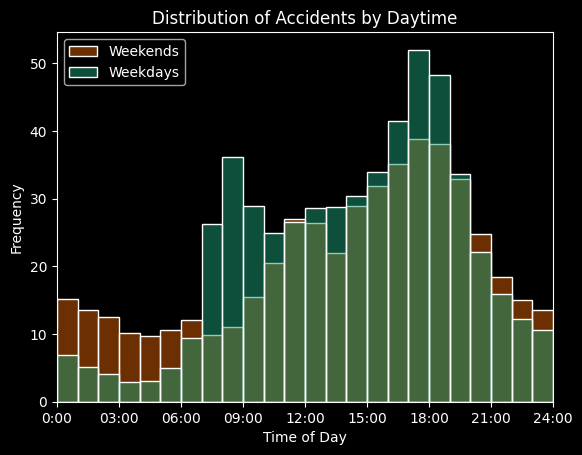

In [6]:
day_time_ticks = (0,300,600,900,1200,1500,1800,2100,2400)
day_time_tick_labels = ('0:00', '03:00','06:00','09:00','12:00','15:00',
                   '18:00','21:00','24:00')
fig= plt.figure();
plot_df = df[['is_weekend', 'hhmm']].astype('int')
weights = plot_df['is_weekend'].apply(lambda x: 0.5 if x==1 else 0.2)
sns.histplot(data=plot_df,
            x='hhmm',
            hue='is_weekend',
            weights=weights,
            stat='frequency',
            bins=24,
            binrange=(0,2400),
            common_norm=False,
            palette='Dark2');
plt.xticks(ticks=day_time_ticks, 
           labels=day_time_tick_labels);
plt.xlabel('Time of Day')
plt.xlim((0,2400))
plt.legend(['Weekends', 'Weekdays']);
plt.title('Distribution of Accidents by Daytime')

# Age and Sex

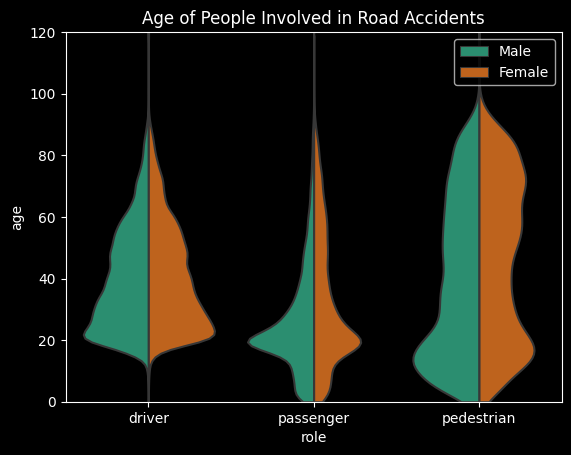

In [8]:
ax = sns.violinplot(data=df, 
                x='role', 
                y='age', 
                hue='sex', 
                split=True, 
                palette='Dark2', 
                inner=None,
                cut=0);
plt.title('Age of People Involved in Road Accidents')
plt.ylim((0,df['age'].max()))
ax.legend(handles=ax.legend_.legend_handles, labels=['Male', 'Female']);
ax.set_xticklabels(['driver', 'passenger', 'pedestrian']);

# Geodata

In [9]:
output_notebook()
earliest_date = df['date'].min().isoformat()
latest_date = df['date'].max().isoformat()
date_picker = DatePicker(title='Select Date', 
                         value=earliest_date, 
                         min_date=earliest_date, 
                         max_date=latest_date)
picked_date = datetime.fromisoformat(date_picker.value)
show(date_picker)

Loading BokehJS ...

In [10]:
output_notebook()

TOOLTIPS = [
    ("index", "@accident_id"),
    ("(lat, lon)", "(@lat, @lon)"),
    ("severity", "@severity_label"),
]

p = figure(x_range=(-750_000, 1_125_000), y_range=(5_755_000, 5_955_000),
           x_axis_type="mercator", y_axis_type="mercator", tooltips=TOOLTIPS)
p.add_tile('STAMEN_TONER')

# Size of sample of data points to plot. 
# More than 10_000 data points can become very slow
plot_cols = ['accident_id', 'longitude', 'latitude', 'severity']
plot_df = df[df['date'].apply(datetime.date)==picked_date.date()][plot_cols]
N_PLOT = 10_000
if len(plot_df)>N_PLOT:
    plot_df = plot_df.sample(n=N_PLOT)

colors = plot_df['severity'].replace({1:'blue', 2:'orangered', 3:'red'})
severity_labels = plot_df['severity'].replace({1:'Unharmed', 2:'Injured', 3:'Killed'})
markers = plot_df['severity'].replace({1:'circle', 2:'square', 3:'triangle'})

source = ColumnDataSource(data={'accident_id': plot_df['accident_id'],
                                'lat':plot_df['latitude'],
                                'lon':plot_df['longitude'],
                                'severity': plot_df['severity'],
                                'color':colors,
                                'severity_label':severity_labels,
                                'marker':markers})

c = p.circle(x='lat',
             y='lon', 
             size=15,
             fill_alpha=0.8,
             fill_color='color',
             line_color='grey',
             line_width=1,
             source=source)

hover = HoverTool(tooltips=TOOLTIPS, renderers=[c])
p.toolbar.active_scroll = p.select_one(WheelZoomTool)
show(p)

Loading BokehJS ...